In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
inp0 = pd.read_csv("loan.csv")

In [4]:
inp0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
## check the data type 
print(inp0.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [6]:
## print the shape of dataset
print(inp0.shape)
print(inp0.info())

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [7]:
## cehck to see how many rows have missing values
print('total number of empty rows:')
print(inp0.isnull().all(axis=1).sum())

total number of empty rows:
0


In [8]:
## checked to see how many colums hase missing values
print('number of empty columns:')
print(inp0.isnull().all(axis=0).sum())

number of empty columns:
54


In [9]:
## checked to see which columns have numm values
inp0.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
## lets drop all the columsn from 53 to 105 as they contains null values:
inp0.drop(inp0.iloc[:, 53:105], inplace = True, axis = 1) 

In [11]:
print(inp0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39717 non-null  int64  
 1   member_id                    39717 non-null  int64  
 2   loan_amnt                    39717 non-null  int64  
 3   funded_amnt                  39717 non-null  int64  
 4   funded_amnt_inv              39717 non-null  float64
 5   term                         39717 non-null  object 
 6   int_rate                     39717 non-null  object 
 7   installment                  39717 non-null  float64
 8   grade                        39717 non-null  object 
 9   sub_grade                    39717 non-null  object 
 10  emp_title                    37258 non-null  object 
 11  emp_length                   38642 non-null  object 
 12  home_ownership               39717 non-null  object 
 13  annual_inc      

In [12]:
## lets drop more columsn which contains all the null values
loan_column_list1=["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
inp0.drop(labels=loan_column_list1,axis=1,inplace=True)

In [13]:
loan_column_list2=["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
inp0.drop(labels=loan_column_list1,axis=1,inplace=True)

KeyError: "['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'tot_hi_cred_lim'] not found in axis"

In [14]:
print(inp0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39717 non-null  int64  
 1   member_id                    39717 non-null  int64  
 2   loan_amnt                    39717 non-null  int64  
 3   funded_amnt                  39717 non-null  int64  
 4   funded_amnt_inv              39717 non-null  float64
 5   term                         39717 non-null  object 
 6   int_rate                     39717 non-null  object 
 7   installment                  39717 non-null  float64
 8   grade                        39717 non-null  object 
 9   sub_grade                    39717 non-null  object 
 10  emp_title                    37258 non-null  object 
 11  emp_length                   38642 non-null  object 
 12  home_ownership               39717 non-null  object 
 13  annual_inc      

In [15]:
loan_column_list3 = ["member_id","url","emp_title","zip_code","tax_liens"]
inp0.drop(labels=loan_column_list3,axis=1,inplace=True)

In [16]:
loan_column_list4 = ["total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
inp0.drop(labels=loan_column_list4,axis=1,inplace=True)

In [17]:
inp0.drop("mths_since_last_major_derog",axis=1,inplace=True)

In [18]:
inp0.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0


In [19]:
## now we brought down columns from 111 to 45 coulmns
## lets change emp_length to have numbers only
inp0.emp_length.fillna('0',inplace=True)
inp0['emp_length']=inp0.emp_length.str.extract('(\d+)')
inp0.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0


In [20]:
## lest also remove percentage symbols from int_rate coulmns so that it contains only nummbers
inp0['int_rate'] = inp0['int_rate'].str.rstrip('%')

In [21]:
## Lets also remove percentage symbols from revol_util coulmns so that it contains only nummbers
inp0['revol_util'] = inp0['revol_util'].str.rstrip('%')

In [22]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  39717 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [23]:
## lets cehck to see how many loans were paid and how many were not paid
(inp0.loan_status.value_counts()*100)/len(inp0)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [24]:
## 82.96% of loans were fully paid
## 14.16% of loans were charges off
## 2.87% of loans are in the process of repaymnet

In [25]:
## lest also convert all the amount columns into numeric type values only
amount_column1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','total_pymnt']
inp0[amount_column1] = inp0[amount_column1].apply(pd.to_numeric)

In [26]:
inp0.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0


In [27]:
## lest see if we have one digit value in any column
single_digit_column = inp0.nunique()
print(single_digit_column)

id                            39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
title                         19615
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1089
total_acc                   

In [28]:
## lest drop all these columns containing single digit values
s1 = single_digit_column[single_digit_column.values == 1]
inp0.drop(columns = list(s1.index), inplace=True)
inp0.shape

(39717, 40)

In [29]:
## now we have come down to 40 columns from 111 columns

In [30]:
## lets check all the interst rates given by the partner
inp0['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [31]:
inp0['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [32]:
inp0.shape

(39717, 40)

In [33]:
## lets checked the time period for the loan
inp0['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [34]:
inp0.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [35]:
inp0['grade'].value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [36]:
inp0['sub_grade'].value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [37]:
inp0.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [38]:
inp0['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [39]:
inp0['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [40]:
## we checked and found most of the loans were taken for debt settlements and for credit card repayment

In [41]:
inp0.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [42]:
inp0['title'].head

<bound method NDFrame.head of 0                         Computer
1                             bike
2             real estate business
3                         personel
4                         Personal
                   ...            
39712             Home Improvement
39713    Retiring credit card debt
39714       MBA Loan Consolidation
39715                     JAL Loan
39716           Consolidation Loan
Name: title, Length: 39717, dtype: object>

In [43]:
## lets also drop title columns as it will not be of any use in our analysis
inp0.drop("title",axis=1,inplace=True)

In [44]:
## now that we have cleaned our dataset we cna now do the data analysis on this

<AxesSubplot:xlabel='loan_amnt'>

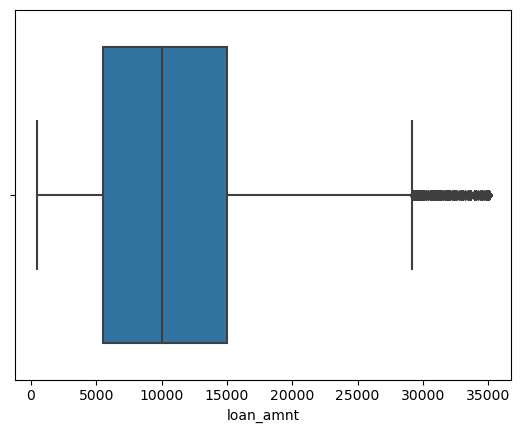

In [45]:
sns.boxplot(inp0.loan_amnt)

<AxesSubplot:xlabel='total_pymnt'>

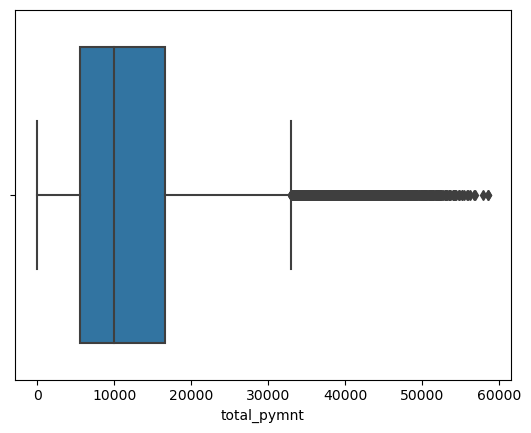

In [46]:
sns.boxplot(inp0.total_pymnt)

<AxesSubplot:xlabel='int_rate'>

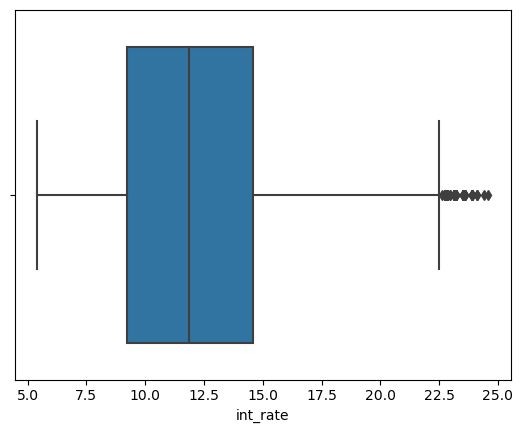

In [47]:
sns.boxplot(inp0.int_rate)

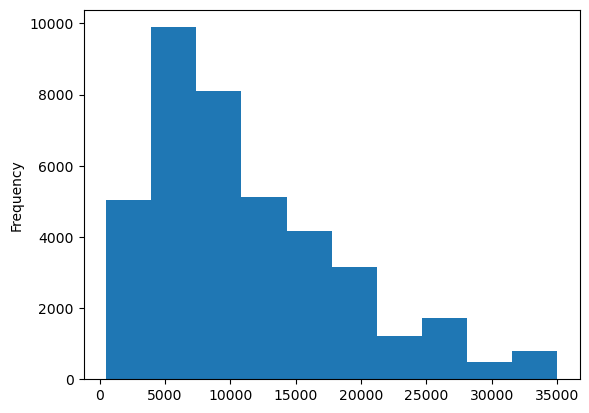

In [48]:
inp0.loan_amnt.plot.hist()
plt.show()

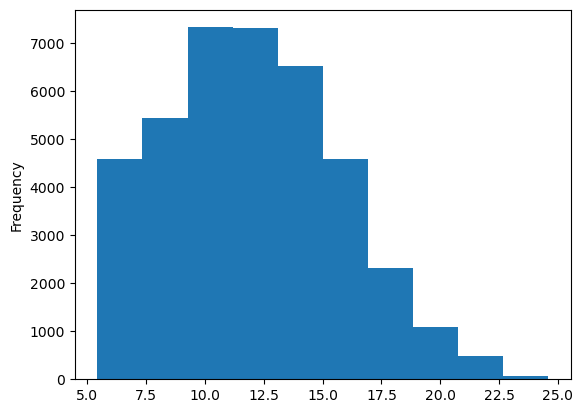

In [49]:
inp0.int_rate.plot.hist()
plt.show()

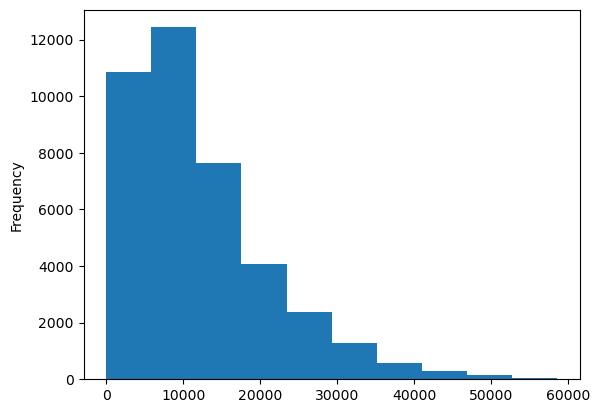

In [51]:
inp0.total_pymnt.plot.hist()
plt.show()

In [53]:
inp0.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [54]:
inp0.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [55]:

inp0.total_pymnt.describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

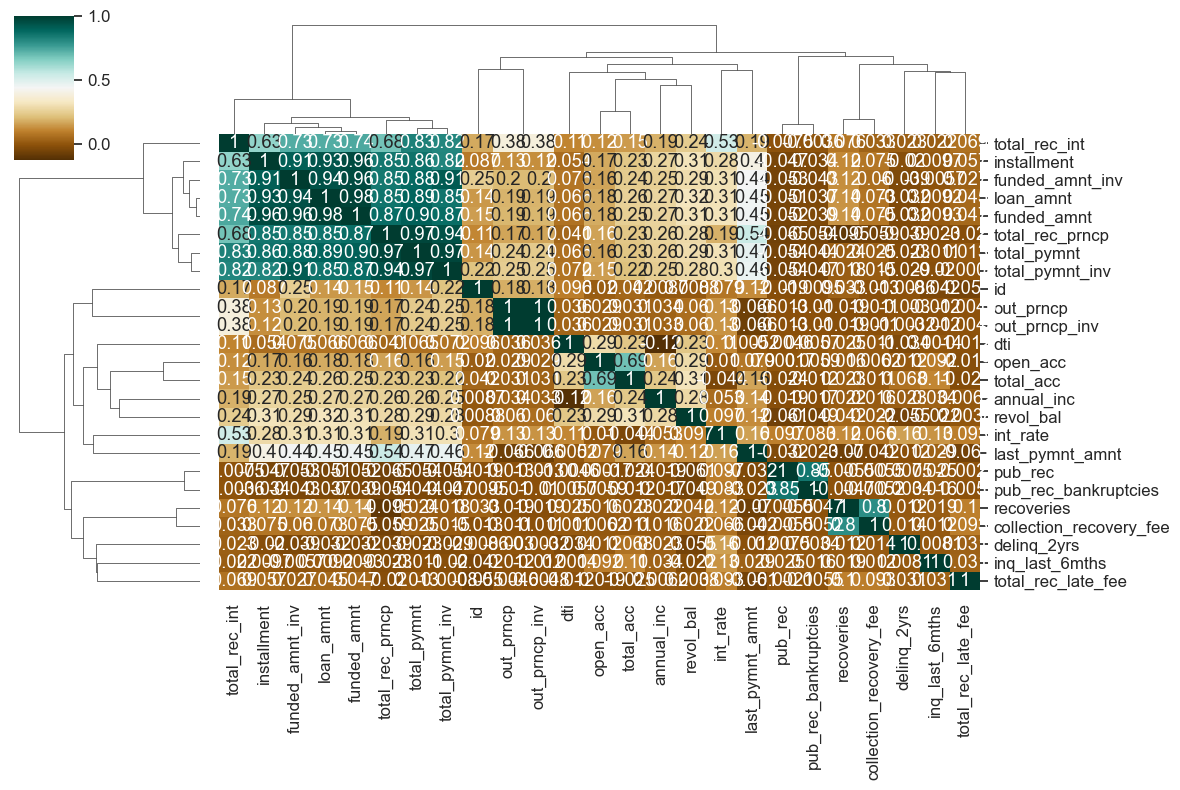

In [56]:
## lets plot a heat map to see some relation between different columns
loan_relation = inp0.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_relation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

In [58]:
### Debt(dti) to income ratio has negative correlation with the annual income meaning low encome results
##in high dti and vice cersa
### loan amount, installment, funded amount, total principal amount are all strongly correlated with each other

In [59]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  float64
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [60]:
inp0.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [61]:
inp0.loan_status.describe()

count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

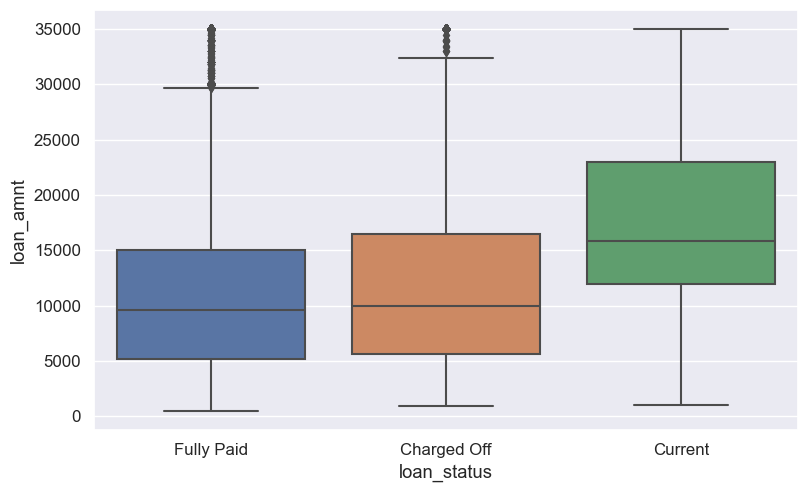

In [62]:
## lets plot a box plot to see relation between loan amount and loan status
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = inp0)
plt.show()

In [63]:
inp0['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [64]:
## now there seems to be huge difference between mean and median so lets limit our data to 75 percentile

In [65]:
inp0_till75 = inp0.loc[(inp0['loan_amnt']<=15000)]

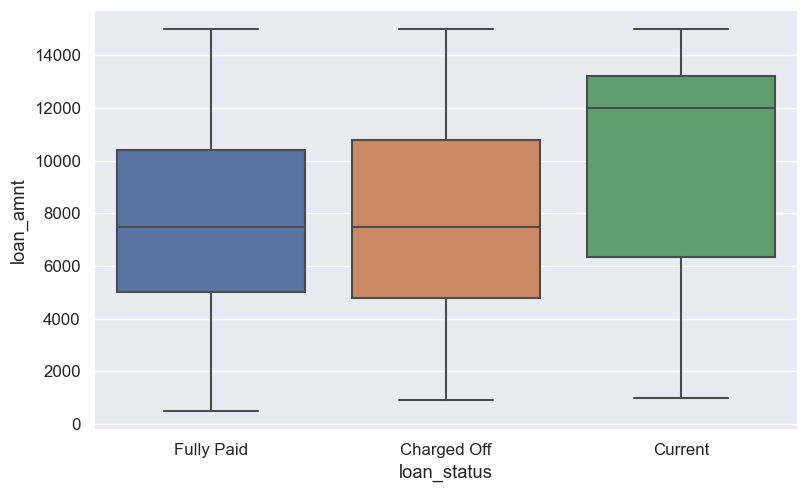

In [66]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = inp0_till75)
plt.show()

In [67]:
## lets see once the data set above 75 percentile

In [68]:
inp0_above75 = inp0.loc[(inp0['loan_amnt']>=15000)]
inp0_above75.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
20,1069740,20250,20250,19142.16108,60 months,15.27,484.63,C,C4,3,...,25433.60,20250.00,7429.05,0.0,0.0,0.0,Aug-15,6024.09,Mar-16,0.0
21,1039153,21000,21000,21000.00000,36 months,12.42,701.73,B,B4,10,...,14025.40,10694.96,3330.44,0.0,0.0,0.0,Sep-13,701.73,May-16,0.0
25,1069697,15000,15000,15000.00000,36 months,9.91,483.38,B,B1,2,...,15824.00,15000.00,824.00,0.0,0.0,0.0,Sep-12,2447.05,Sep-12,0.0
26,1069800,15000,15000,8725.00000,36 months,14.27,514.64,C,C2,9,...,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,May-16,0.0
31,1069539,31825,31825,31825.00000,36 months,7.90,995.82,A,A4,5,...,34886.91,31825.00,3061.91,0.0,0.0,0.0,Aug-13,16966.70,Feb-16,0.0


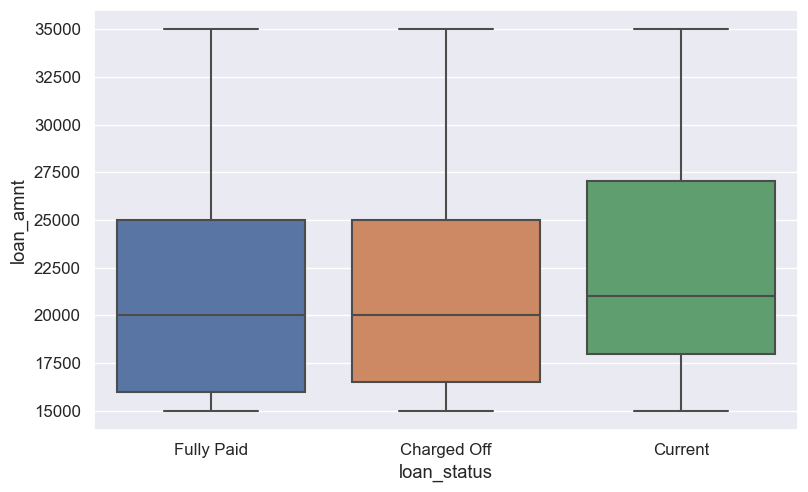

In [69]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = inp0_above75)
plt.show()

In [71]:
### now we can see from the above box plot that higher the loan amount is it increases the chances of adjusting 
##off the loan amount
## also we already so above earlier that around 14% loans were chagred off in total

In [72]:
## lest try to do a bivariate analysis on annual income to charged off amount

In [73]:
inc_range_vs_inp0 = inp0.groupby(['annual_inc', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_inp0['Total'] = inc_range_vs_inp0['Charged Off'] + inc_range_vs_inp0['Current'] + inc_range_vs_inp0['Fully Paid'] 
inc_range_vs_inp0['Chargedoff_Proportion'] = inc_range_vs_inp0['Charged Off'] / inc_range_vs_inp0['Total']
inc_range_vs_inp0.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2525,56898.00,1.0,0.0,0.0,1.0,1.0
812,32124.00,1.0,0.0,0.0,1.0,1.0
4682,118527.00,1.0,0.0,0.0,1.0,1.0
912,33612.00,1.0,0.0,0.0,1.0,1.0
3431,73392.00,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...
2082,50364.00,0.0,0.0,1.0,1.0,0.0
2083,50376.00,0.0,0.0,1.0,1.0,0.0
2085,50402.03,0.0,0.0,1.0,1.0,0.0
2086,50426.00,0.0,0.0,1.0,1.0,0.0


ValueError: Could not interpret input 'Chargedoff_Proportion'

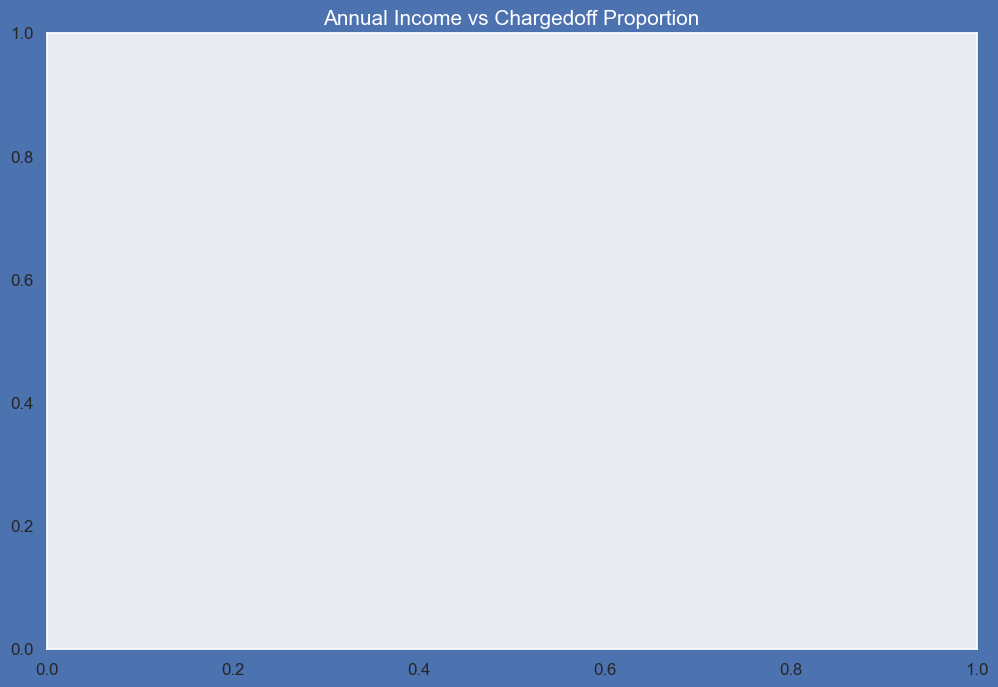

In [103]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc', y='Chargedoff_Proportion', data=inp0)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

In [75]:
inp0.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


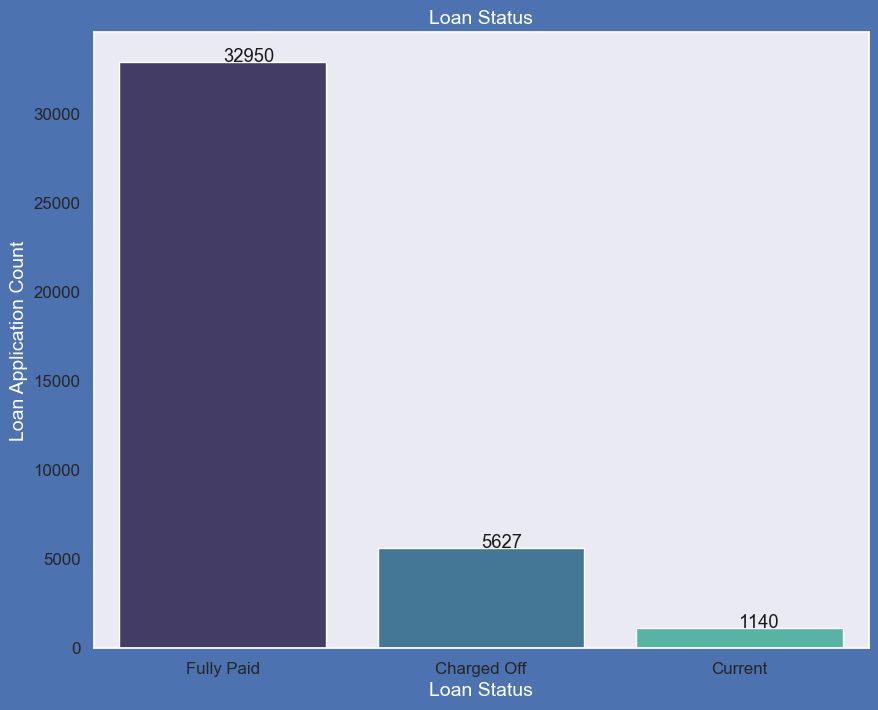

In [80]:
plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=inp0,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=inp0['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

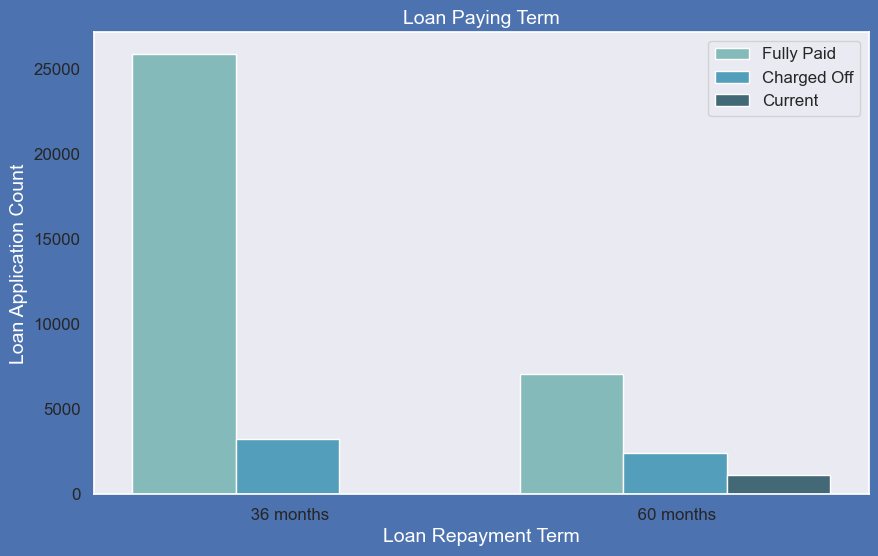

In [92]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=inp0,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
### higher the laon payment time was higher the chences of the loan being written is


In [97]:
inp0(column='int_rate', trailer='%')
Univariate_Categorical(column='int_rate_p')

TypeError: 'DataFrame' object is not callable

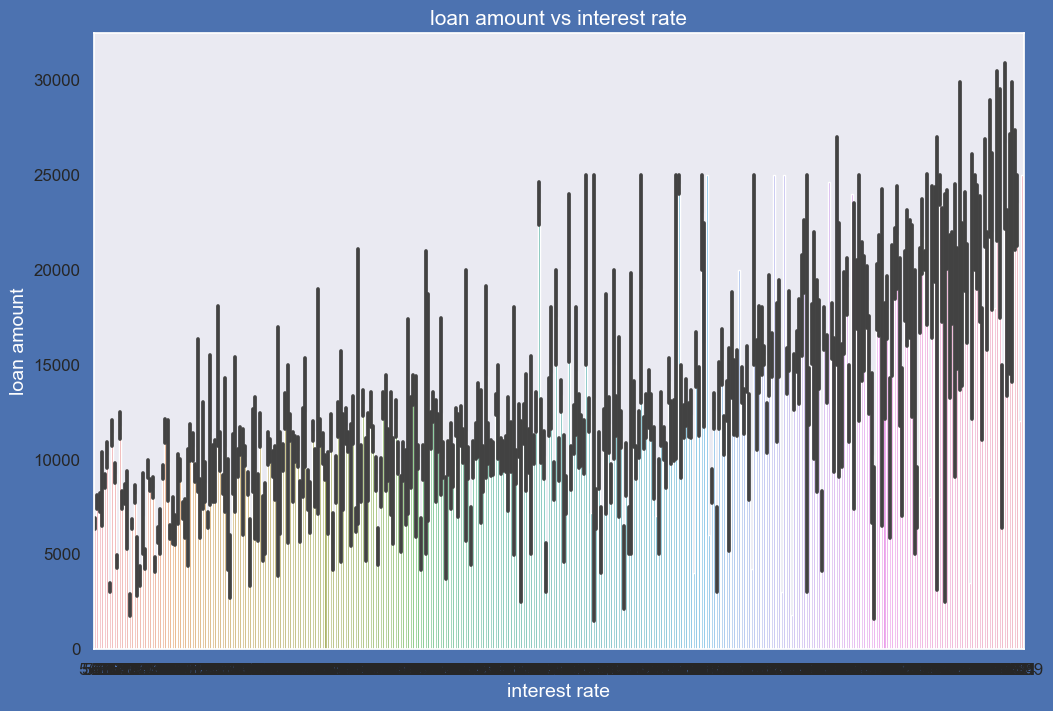

In [101]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('loan amount vs interest rate',fontsize=15,color = 'w')
ax1=sns.barplot(x='int_rate', y='loan_amnt', data=inp0)
ax1.set_ylabel('loan amount',fontsize=14,color = 'w')
ax1.set_xlabel('interest rate',fontsize=14,color='w')
plt.show()

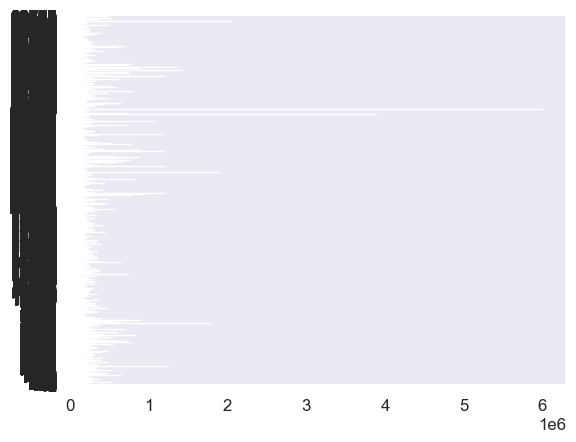

In [109]:
inp0.groupby(['loan_status'])['annual_inc'].plot.barh()
plt.show()

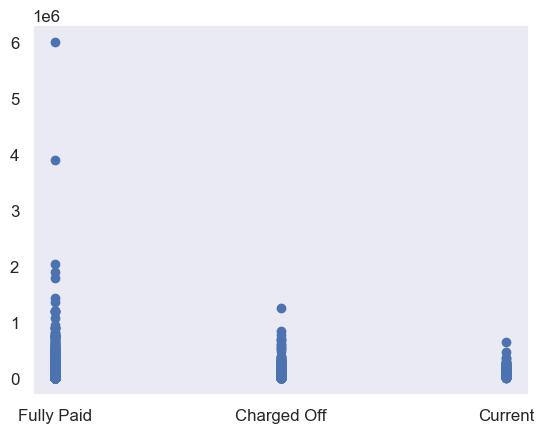

In [123]:
### lest do a bivariate anaylsis on loan_status vs annual_inc
plt.scatter(inp0.loan_status, inp0.annual_inc)
plt.show()

In [124]:
#### we can determine higher the salary is lowed is the chances of loan being written off

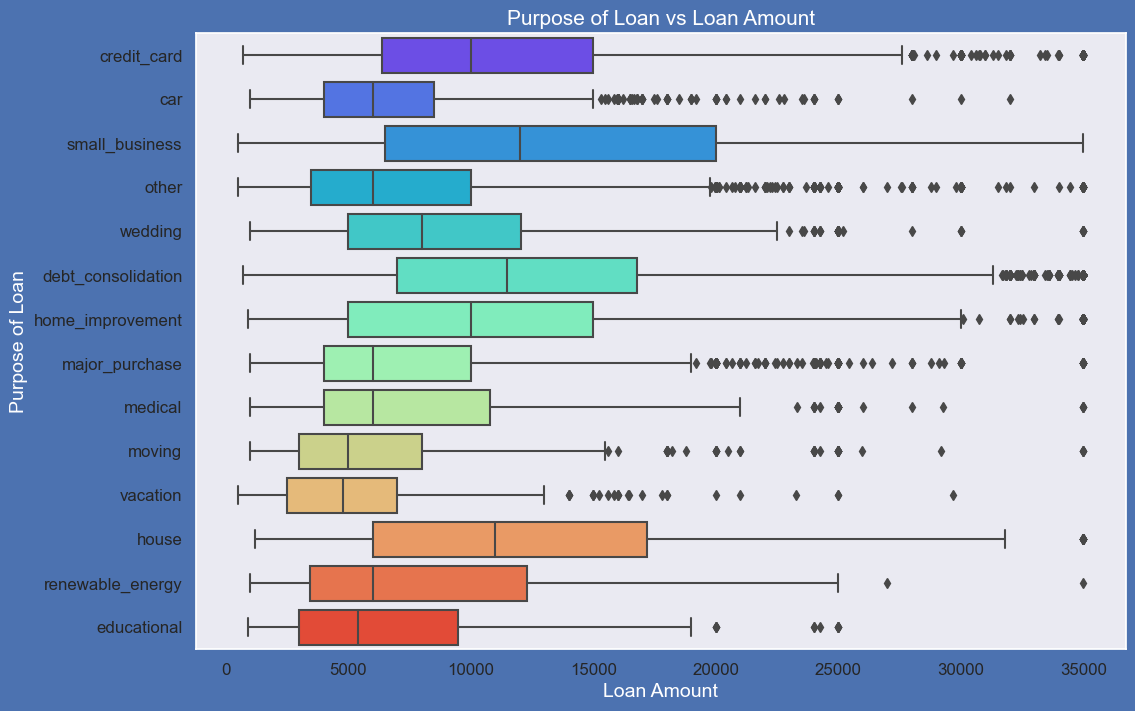

In [125]:
plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =inp0,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

In [126]:
### small business owners take out loan more often follwed by debt-consolidation

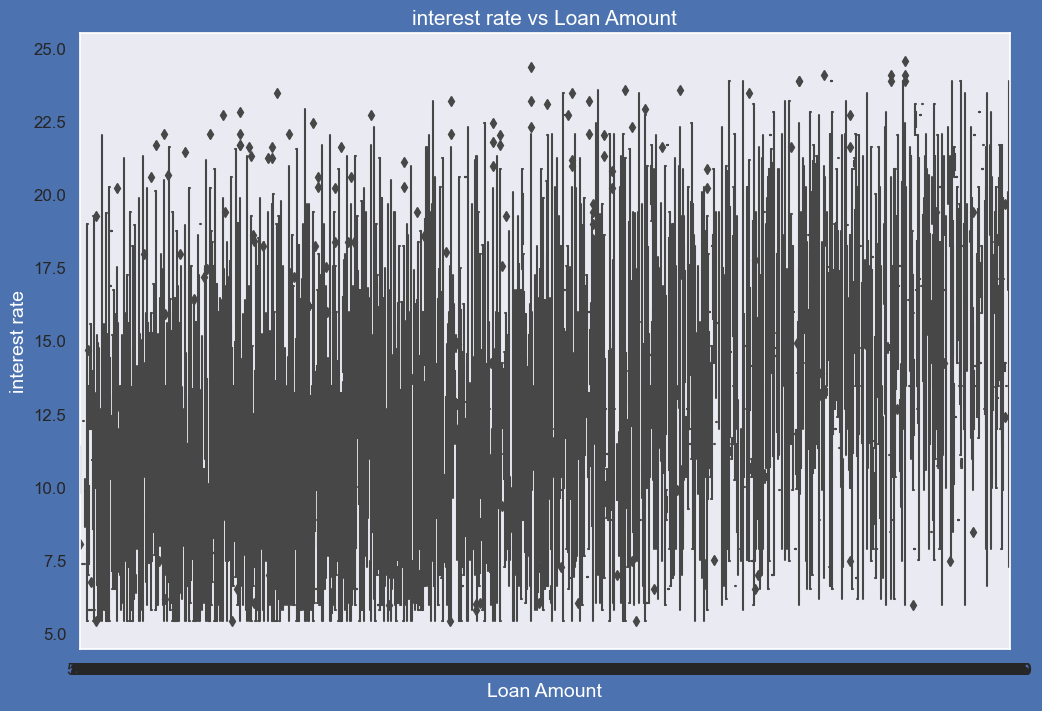

In [128]:
plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='loan_amnt', data =inp0,palette='rainbow')
ax.set_title('interest rate vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('interest rate',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

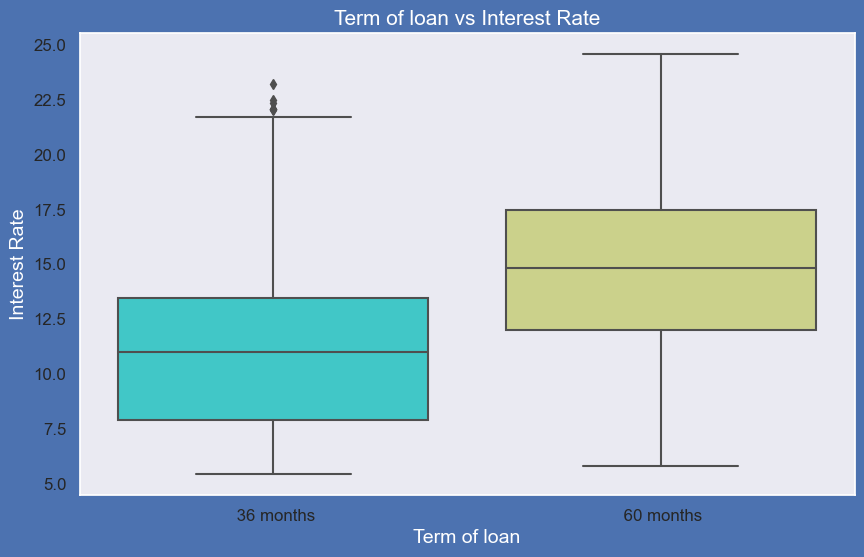

In [129]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =inp0,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

In [130]:
## higher the loan term is more are the chances of non-repaymen tof loan

In [136]:
loan_eda_pair = inp0[['loan_amnt', 'annual_inc', 'emp_length','int_rate','loan_status']].copy()
loan_eda_pair.head()

,loan_amnt,annual_inc,emp_length,int_rate,loan_status
0,5000,24000.0,10,10.65,Fully Paid
1,2500,30000.0,1,15.27,Charged Off
2,2400,12252.0,10,15.96,Fully Paid
3,10000,49200.0,10,13.49,Fully Paid
4,3000,80000.0,1,12.69,Current


In [137]:
loan_eda_pair['loan_amnt'] = np.log10(loan_eda_pair['loan_amnt'])
loan_eda_pair['annual_inc'] = np.log10(loan_eda_pair['annual_inc'])
loan_eda_pair['int_rate'] = np.log10(loan_eda_pair['int_rate'])

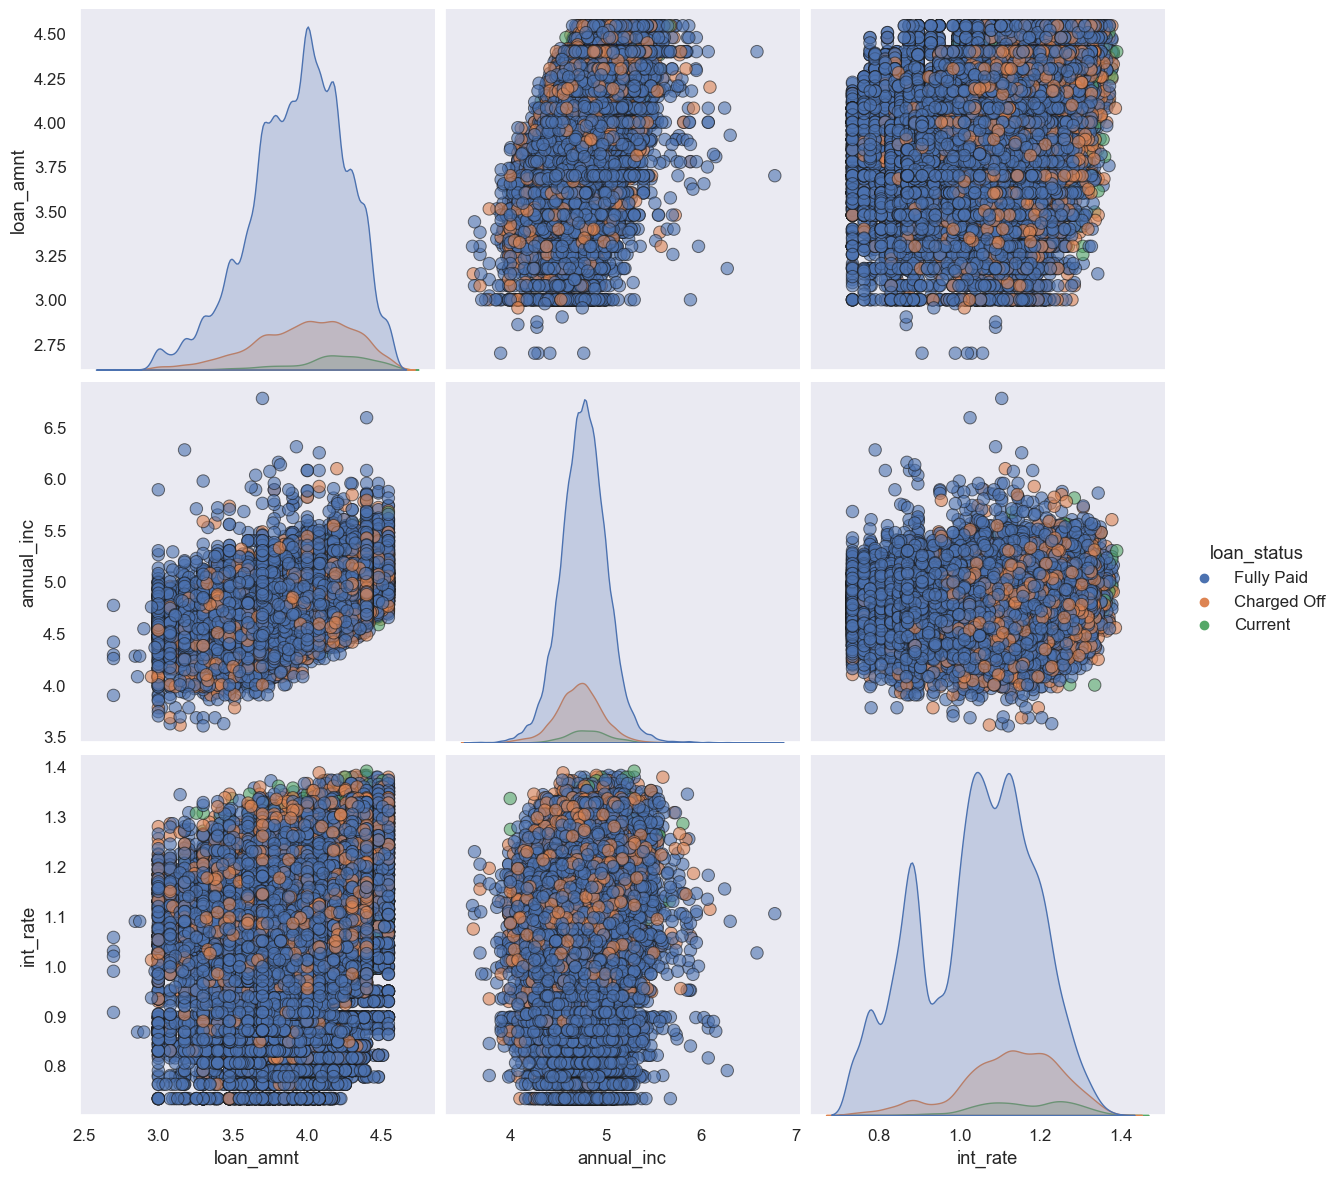

In [139]:
sns.pairplot(loan_eda_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

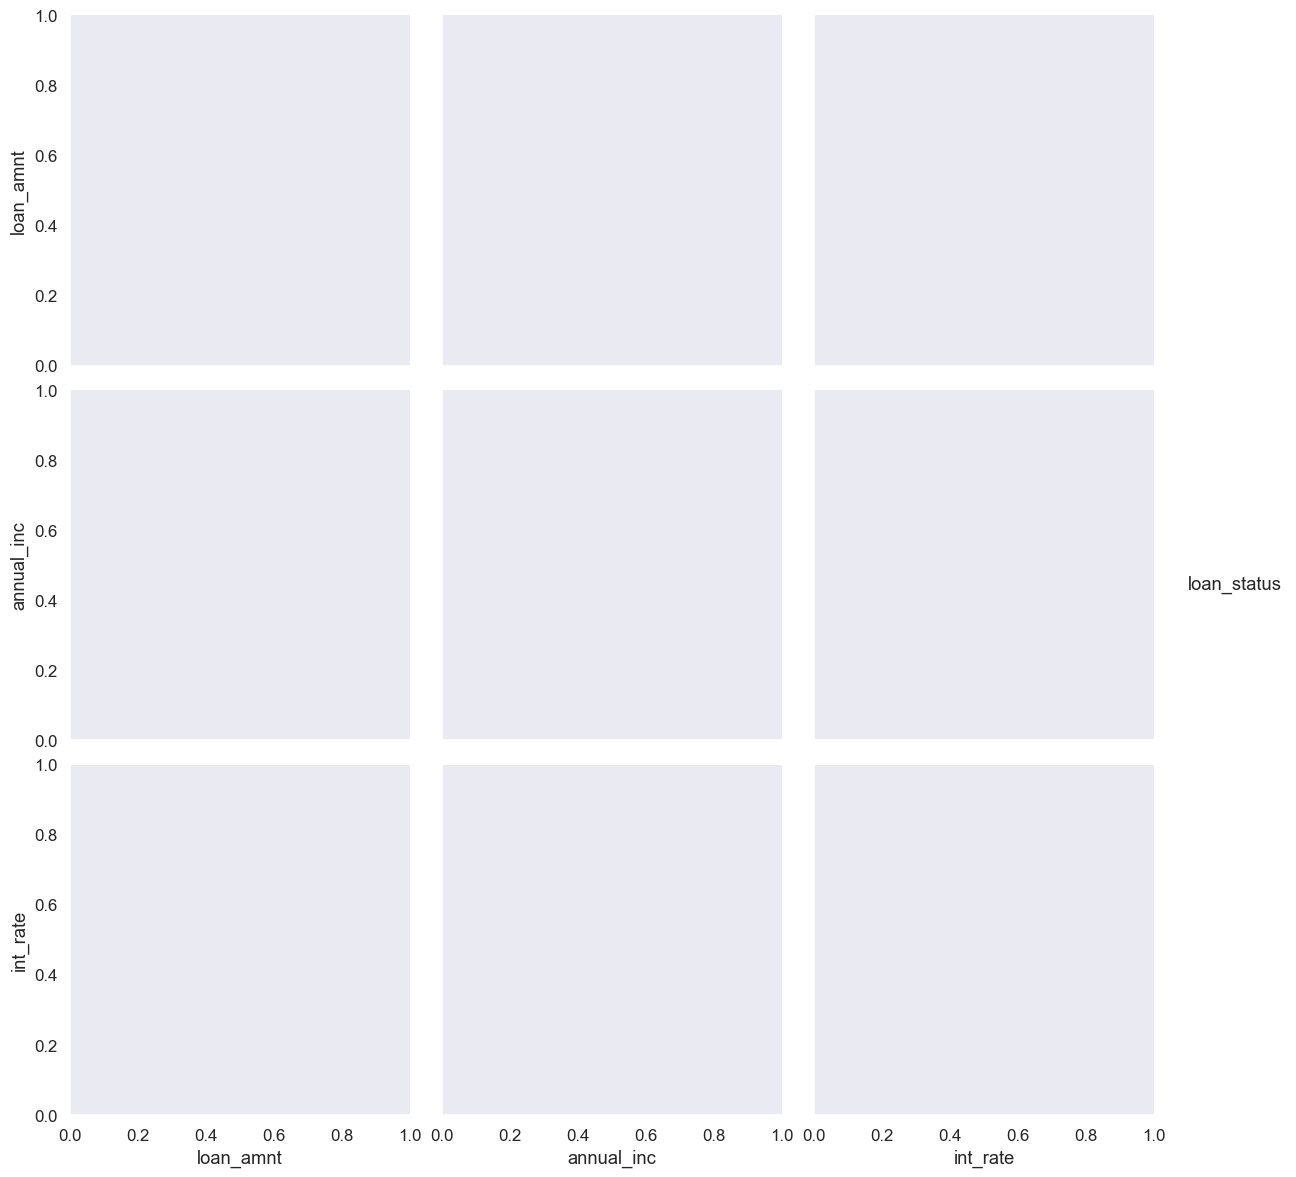

In [141]:
sns.pairplot(loan_eda_pair[loan_eda_pair['emp_length'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);